In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
pd.set_option('display.max_rows', df.shape[0]+1)
# pd.set_option('display.max_rows', 10)

NameError: name 'df' is not defined

In [414]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col=0)
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv', index_col=0)

In [415]:
print(train_data.shape)
train_data.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [416]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Removing missing values

In [417]:
train_data[train_data.FireplaceQu.notnull()]["SalePrice"].describe()

count       770.000000
mean     216397.692208
std       86843.901262
min       60000.000000
25%      159000.000000
50%      191000.000000
75%      257375.000000
max      755000.000000
Name: SalePrice, dtype: float64

### First, let's remove variables with most of the values missing

In [455]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

In [456]:
df = pd.concat([X , test_data])
# df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1)

In [457]:
df.shape

(2919, 79)

## Then let's remove missing values

In [458]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum().sort_values(ascending=False))

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
SaleType            1
BsmtFinSF1          1
KitchenQual         1
GarageCars          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
MSSubClass          0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

## Numerical values

In [459]:
numerical = list( df.loc[:,df.dtypes != 'object'].columns.values )
categorical = list( df.loc[:,df.dtypes == 'object'].columns.values )

In [460]:
missing_num = df[numerical].isnull().sum()
missing_num = missing_num[missing_num > 0]
missing_num.sort_values()

BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
BsmtFullBath      2
BsmtHalfBath      2
MasVnrArea       23
GarageYrBlt     159
LotFrontage     486
dtype: int64

In [461]:
x = [1000, 2000, 4000, 10000, 25000, 50000, 500000]

df['LotFrontage'] = df.groupby(pd.cut(df['LotArea'], x))['LotFrontage'].apply(lambda x: x.fillna(x.median()))

# df.groupby(pd.cut(df['LotArea'], x))['LotFrontage'].median()

# numerical.remove("LotFrontage")
for feature in numerical:
    df[feature] = df[feature].fillna(0)

### Categorical values

In [462]:
missing_cat = df[categorical].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]
missing_cat.sort_values()

Electrical         1
KitchenQual        1
Exterior2nd        1
SaleType           1
Exterior1st        1
Utilities          2
Functional         2
MSZoning           4
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [463]:
cat_exclude = ['MasVnrType', "MSZoning", "Functional", "Utilities", "Exterior1st", "SaleType", "Exterior2nd", "KitchenQual", "Electrical"]
for feature in missing_cat.drop(cat_exclude).index:
    df[feature] = df[feature].fillna("NA")

In [464]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [465]:
df['MasVnrType'] = df.FireplaceQu.fillna("None")
cat_exclude.remove("MasVnrType")

In [466]:
df[cat_exclude] = df.groupby('Neighborhood')[cat_exclude].transform(lambda x: x.fillna(x.mode()[0]))   

In [467]:
df[df.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,


## Change categories to numbers

In [468]:
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [469]:
rate_0 = ['NA', 'None']
rate_1 = ['C (all)', 'Grvl', 'Reg', 'Low', 'ELO', 'Inside','Sev', 'Po', 'No', 'Unf', 'Sev', 'MnWw']
rate_2 = ['FV', 'Pave', 'IR1', 'HLS', 'NoSeWa','Corner','Mod', 'Fa', 'Mn','LwQ', 'Maj2', 'RFn', 'GdWo']
rate_3 = ['RH', 'IR2', 'Bnk', 'NoSewr','CulDSac','Gtl', 'TA', 'Av', 'Rec', 'Maj1', 'Fin', 'MnPrv']
rate_4 = ['RM', 'IR3', 'Lvl', 'AllPub','FR2', 'Gd', 'BLQ', 'Mod', 'GdPrv']
rate_5 = ['RL','FR3','Ex','ALQ', 'Min2']
rate_6 = ['GLQ', 'Min1']
rate_7 = ['Typ']

rate = [rate_0, rate_1, rate_2, rate_3, rate_4, rate_5, rate_6, rate_7]

# Given a categorical value [cat], return [i] such that [cat \in rate_i]
def cat_to_int(cat): 
    return next(filter(lambda rate_i : cat in rate_i[1], enumerate(rate)))[0] 

# List of all categorical values
flat_rate = sum(rate, [])

# Generate the dictionary
replace_dictionary = dict( map(lambda cat: (cat, cat_to_int(cat)), flat_rate ) )

In [470]:
df[categorical] = df[categorical].replace(replace_dictionary)

In [471]:
list( df.loc[:,df.dtypes == 'object'].columns.values )

['Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [472]:
df.TotalBsmtSF

Id
1        856.0
2       1262.0
3        920.0
4        756.0
5       1145.0
         ...  
2915     546.0
2916     546.0
2917    1224.0
2918     912.0
2919     996.0
Name: TotalBsmtSF, Length: 2919, dtype: float64

## Let's add new features

In [473]:
# df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']).astype(int)
df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)
df["Remodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]).astype(int)
df["RecentRemodel"] = (df["YearRemodAdd"] == df["YrSold"]).astype(int)

# df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# df['Total_Bathrooms'] = ((df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))).astype(int)

In [42]:
# df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# df['Total_Bathrooms'] = ((df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))).astype(int)

In [475]:
df[['TotalSF']].corrwith(y)

TotalSF    0.78226
dtype: float64

## Deal with outliers

In [70]:
df["SalePrice"] = y
numeric_columns = df.select_dtypes(['int64','float64']).columns
numeric = df[numeric_columns]

In [88]:
from scipy import stats 

cut_off = 4

def value_of_outliers(column):
    
    if len(set(df[column])) < 2 * cut_off: 
        return df[column].max()
    
    sep = (df[column].max() - df[column].min())  / cut_off
    diff = np.diff(np.sort(df[column]))
    
    out = list(map(lambda x: x[0], filter(lambda d: d[1] > sep, enumerate(diff))))
    
    if len(out) == 0:
        return df[column].max()
    
    up_lim = np.sort(df[column])[out[0]] 
    
    
    return up_lim


def detect_outliers(column):
    
    if len(set(df[column])) < 2 * cut_off: 
        return df[df[column] > 1000000000000] # TODO: fix 
    
    sep = (df[column].max() - df[column].min())  / cut_off
    diff = np.diff(np.sort(df[column]))
    
    out = list(map(lambda x: x[0], filter(lambda d: d[1] > sep, enumerate(diff))))
    
    if len(out) == 0: 
        return df[df[column] > 1000000000000] # TODO: fix
    
    up_lim = np.sort(df[column])[out[0]] 
    
    
    return df[df[column] > up_lim]


out = []

for i, feature in enumerate(numeric.columns):
    dd = detect_outliers(feature)
    
    out.append( (feature, dd.index.values.tolist()))
    
#     print(feature)
#     plt.figure(i)
#     plt.title(feature)
#     df[feature].hist(bins=50)
#     (np.log1p(df[feature])).hist(bins = 50)

out = list(filter(lambda l: len(l[1]) > 0, out))
print(out)



# IQR = stats.iqr(df.LotArea, interpolation = 'midpoint') 
# IQR 

[('BsmtUnfSF', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 

In [476]:
df.loc[(df['GarageYrBlt'] > 2020), 'GarageYrBlt'] = 2007

In [477]:
df.loc[[250]].LotArea = 15900

In [478]:
outliers = [1299, 336]

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


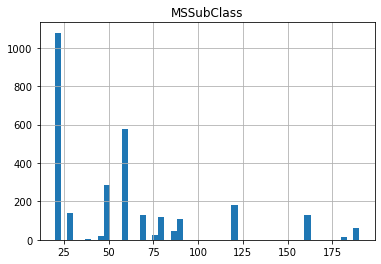

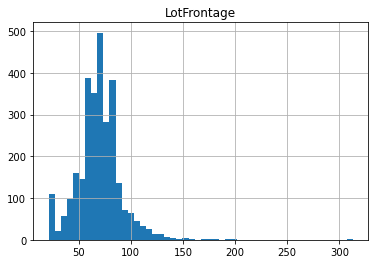

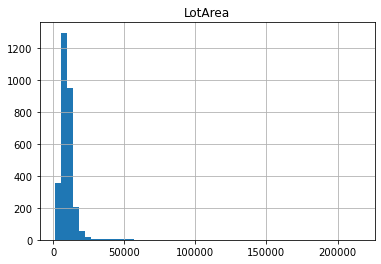

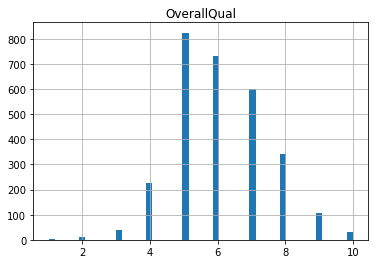

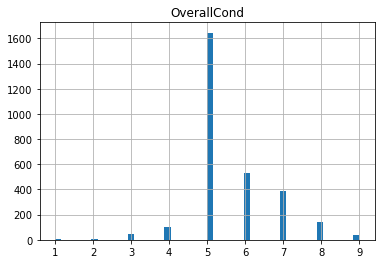

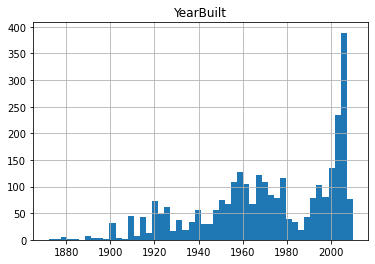

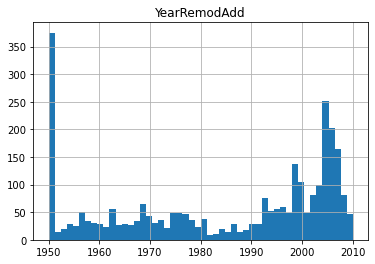

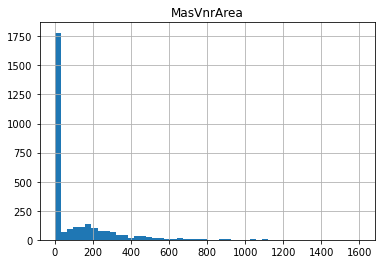

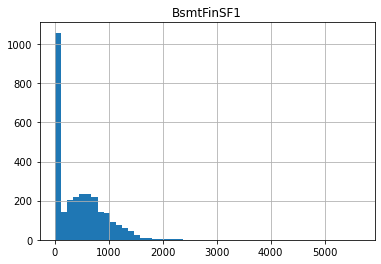

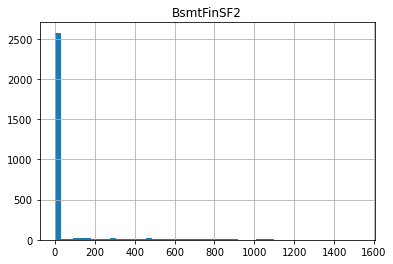

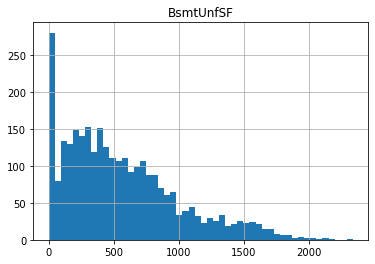

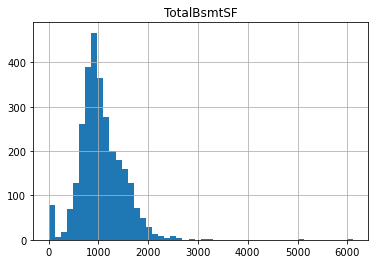

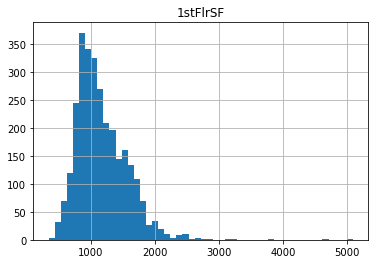

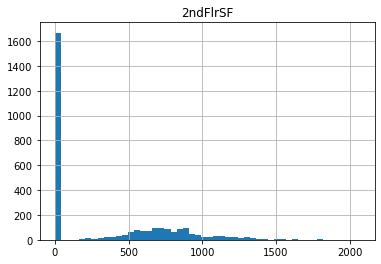

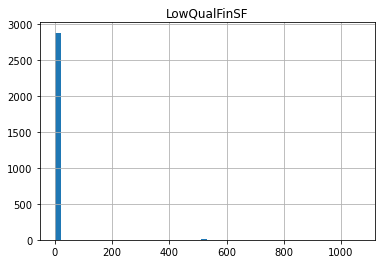

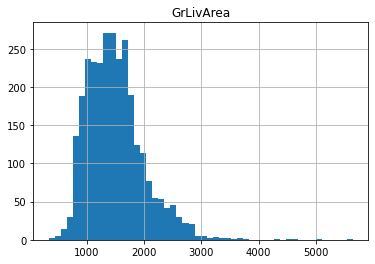

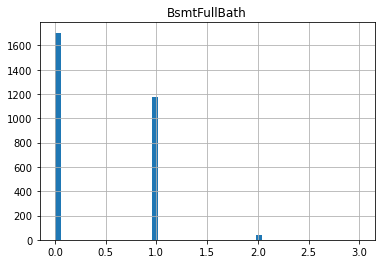

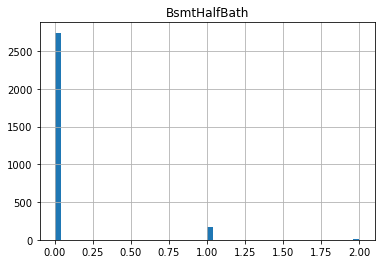

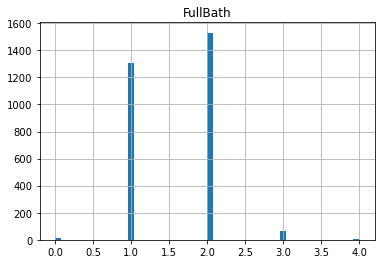

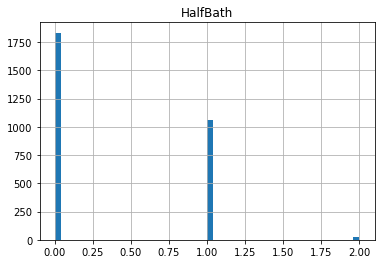

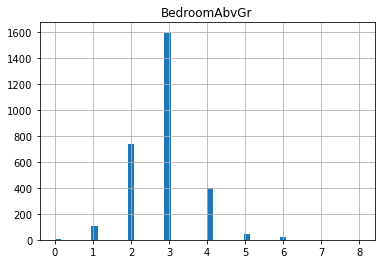

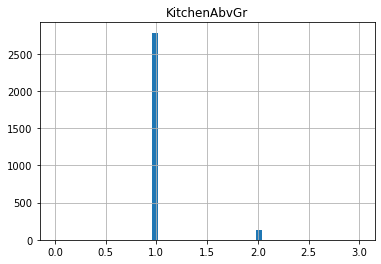

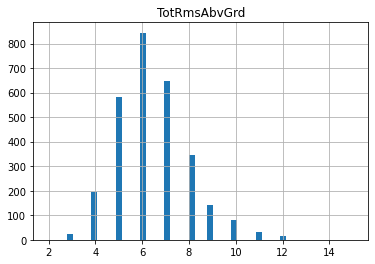

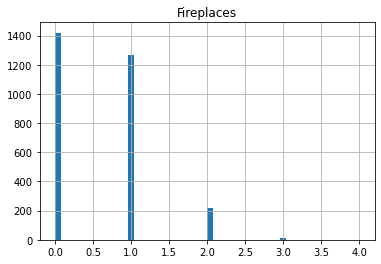

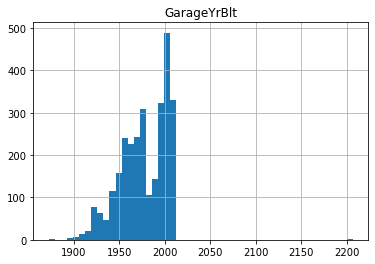

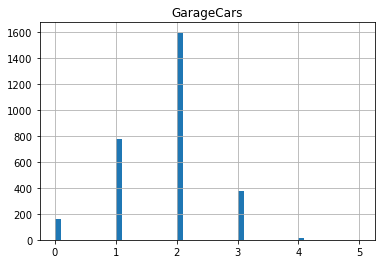

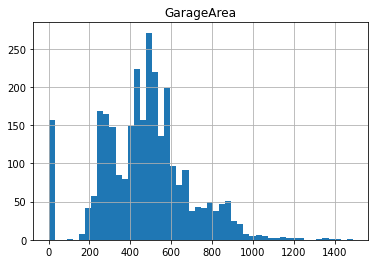

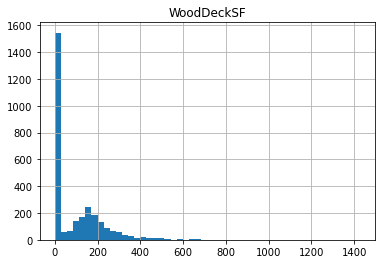

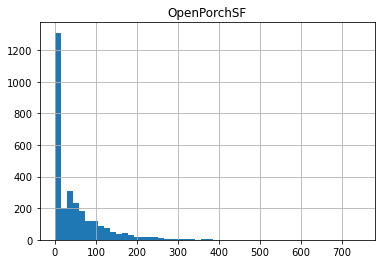

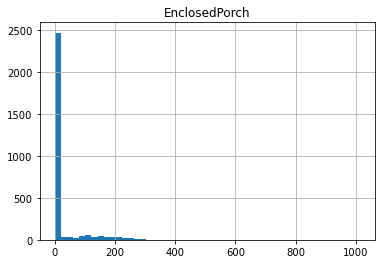

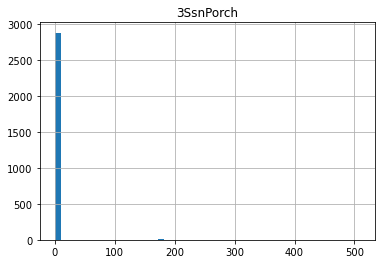

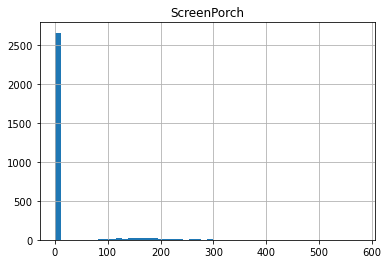

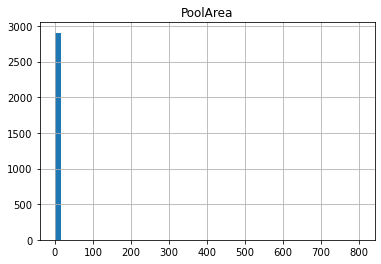

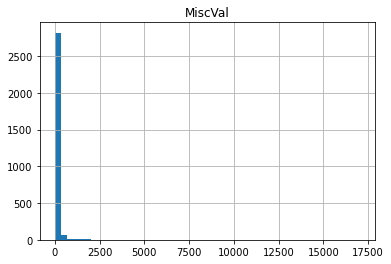

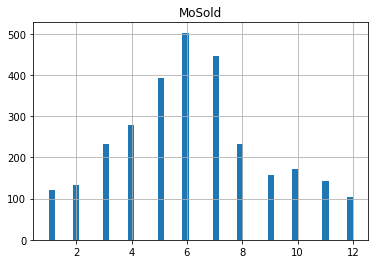

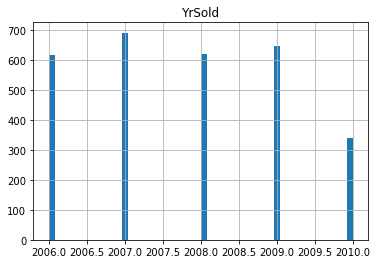

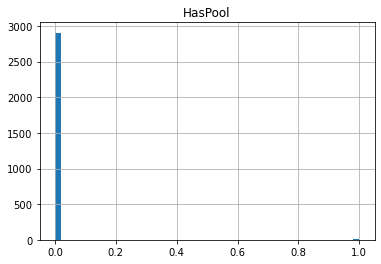

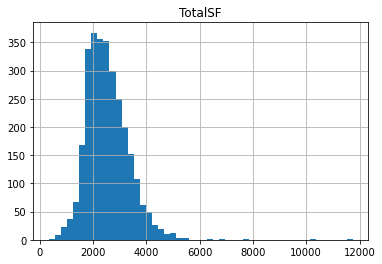

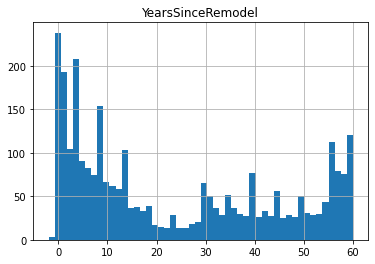

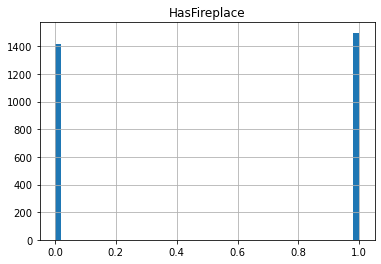

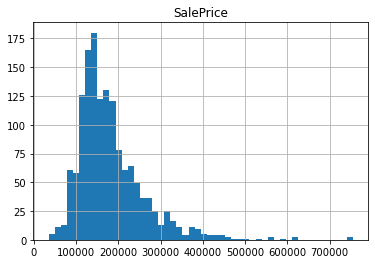

In [160]:
for i, feature in enumerate(numeric.columns):
#     print(feature)
    plt.figure(i)
    plt.title(feature)
    df[feature].hist(bins=50)
#     plt.axvline(x= value_of_outliers(feature) , color='r')

#     (np.log1p(df[feature])).hist(bins = 50)

In [209]:
df.loc[347]

MSSubClass                 20
MSZoning                   RL
LotFrontage              73.0
LotArea                 12772
Street                   Pave
LotShape                  IR1
LandContour               Lvl
Utilities              AllPub
LotConfig             CulDSac
LandSlope                 Gtl
Neighborhood            NAmes
Condition1               Norm
Condition2               Norm
BldgType                 1Fam
HouseStyle             1Story
OverallQual                 6
OverallCond                 8
YearBuilt                1960
YearRemodAdd             1998
RoofStyle                 Hip
RoofMatl              CompShg
Exterior1st           MetalSd
Exterior2nd           MetalSd
MasVnrType               None
MasVnrArea                0.0
ExterQual                  TA
ExterCond                  Gd
Foundation             CBlock
BsmtQual                   TA
BsmtCond                   TA
BsmtExposure               Mn
BsmtFinType1              BLQ
BsmtFinSF1              498.0
BsmtFinTyp

In [201]:
df.LotArea.describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

In [141]:
# potential_outliers.append(df[df.LotFrontage > 250].index.values.tolist())
# potential_outliers.append(df[df.LotArea > 100000].index.values.tolist())
# potential_outliers.append(df[df.MasVnrArea > 1400].index.values.tolist())
# potential_outliers.append(df[df.BsmtFinSF1 > 3000].index.values.tolist())
# potential_outliers.append(df[df['1stFlrSF'] > 4000].index.values.tolist()())
# potential_outliers.append(df[df['2ndFlrSF'] > 2000].index.values.tolist())
# potential_outliers.append(df[df.OpenPorchSF > 550].index.values.tolist())
# potential_outliers.append(df[df.EnclosedPorch > 550].index.values.tolist())
# potential_outliers.append(df[df.OpenPorchSF > 550].index.values.tolist())
# potential_outliers.append(df[df.OpenPorchSF > 550].index.values.tolist())

<AxesSubplot:>

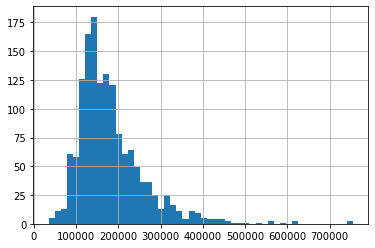

In [207]:
y.hist(bins=50)

In [152]:
df[df.EnclosedPorch > 550].index

Int64Index([198, 2504, 2568], dtype='int64', name='Id')

In [138]:
df[df['2FlrSF'] > 2000].index.values

array([1183])

In [479]:
df = df.drop(outliers, axis=0)

In [222]:
# df = df.drop(['SalePrice'], axis=1)

## Fix skewness

<AxesSubplot:>

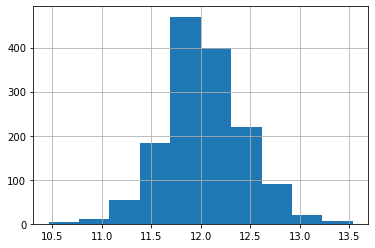

In [480]:
y = np.log1p(y)
y.hist()

In [481]:
from scipy.stats import norm, skew

In [482]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.7]
high_skew.head(50)

MiscVal          21.955112
PoolQC           19.548879
PoolArea         17.688664
LotArea          12.904198
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.145847
Alley             4.136731
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
BsmtFinType2      3.159290
RecentRemodel     3.065363
MasVnrArea        2.616780
OpenPorchSF       2.538830
LotConfig         2.123768
WoodDeckSF        1.835145
Fence             1.753731
MSSubClass        1.374702
ExterCond         1.315069
1stFlrSF          1.282669
LotShape          1.247973
GrLivArea         1.128698
BsmtExposure      1.119066
TotalSF           1.083281
LotFrontage       1.060208
BsmtFinSF1        0.992957
BsmtUnfSF         0.918657
2ndFlrSF          0.862438
ExterQual         0.784392
TotRmsAbvGrd      0.751803
Fireplaces        0.725036
BsmtQual         -1.270529
MSZoning         -2.660058
GarageQual       -3.262260
GarageCond       -3.381673
L

In [483]:
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


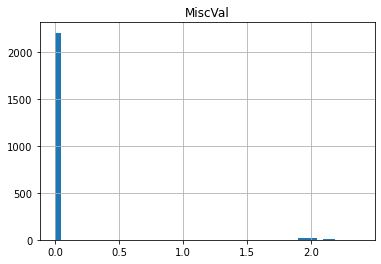

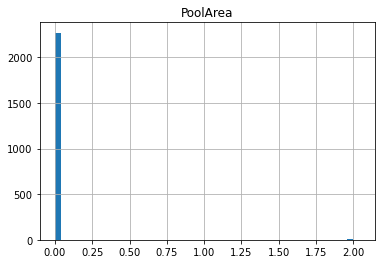

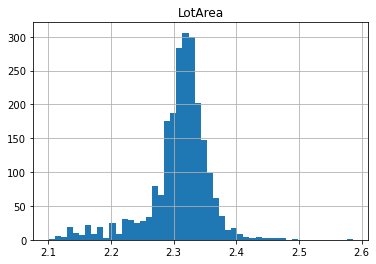

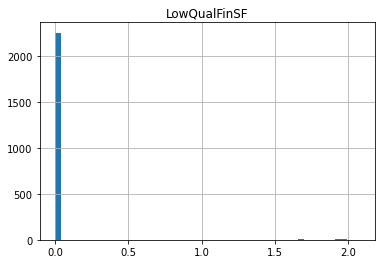

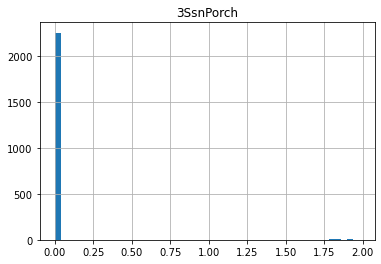

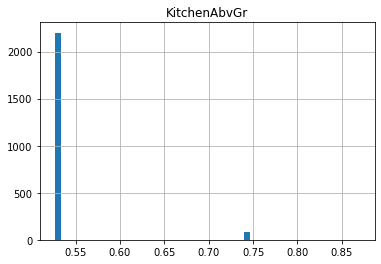

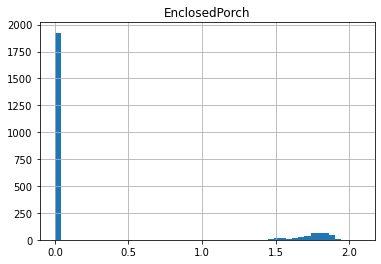

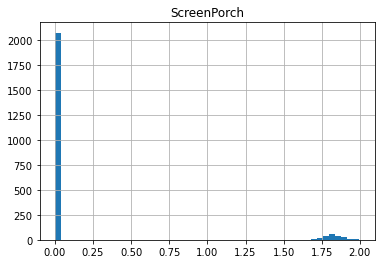

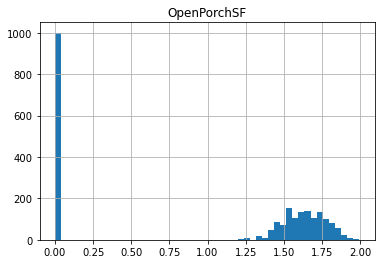

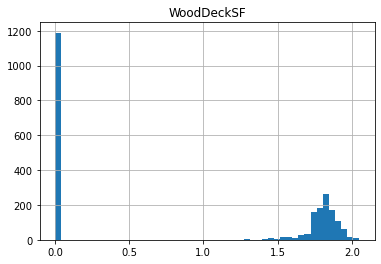

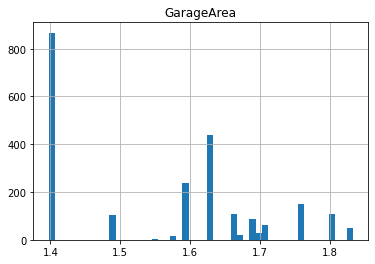

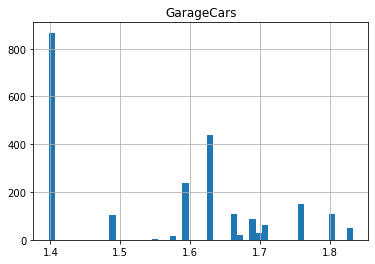

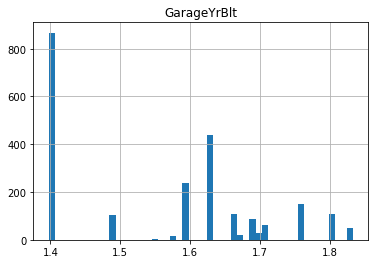

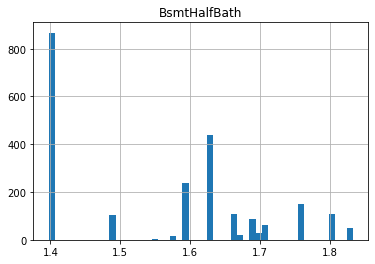

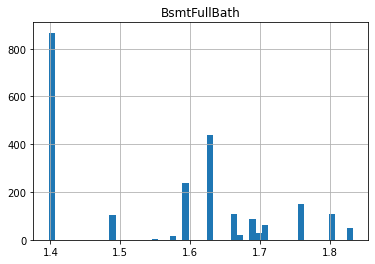

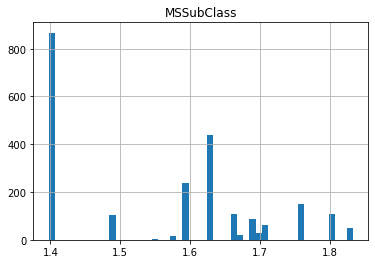

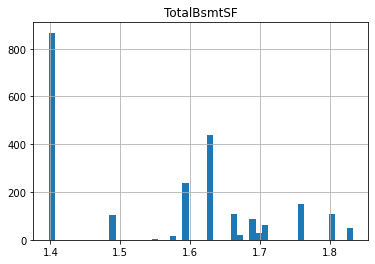

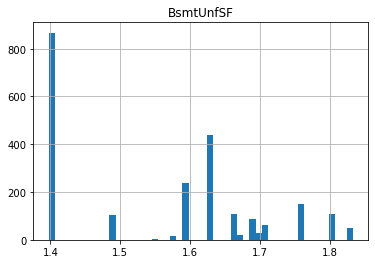

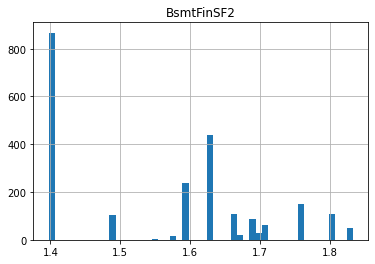

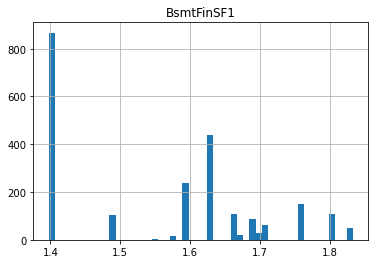

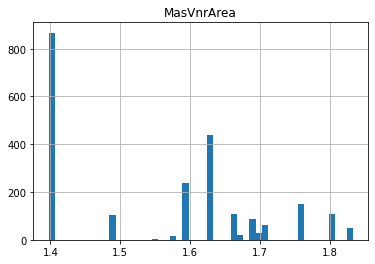

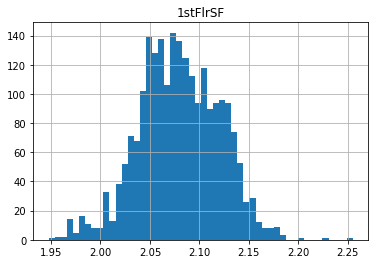

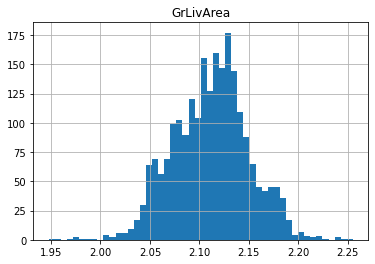

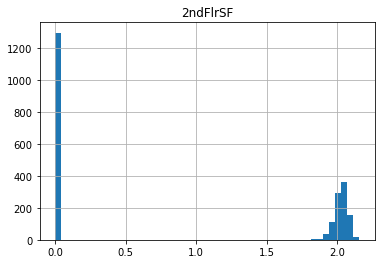

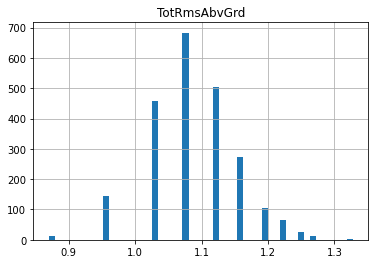

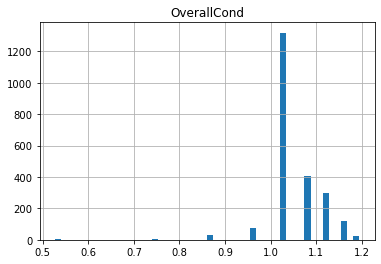

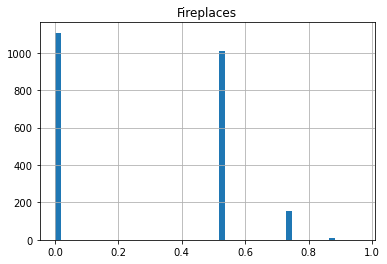

In [35]:
# for i, feature in enumerate(high_skew.index):
#     plt.figure(i)
#     plt.title(feature)
#     (np.log1p(df[feature])).hist(bins = 50)
#     (df[feature]).hist(bins = 50, density = False)

# for feature in high_skew[:5].index:
#     matplotlib.pyplot.subplot(nrows, ncols, r) 
#     plt.hist() 
    
#     (np.log1p(df[feature])).hist()

### Delete variables with low correlation with the price

In [43]:
corr = df.corrwith(y)#["SalePrice"]

In [44]:
corr[abs(corr) < 0.05]

MSSubClass     -0.020279
OverallCond    -0.036868
BsmtFinSF2     -0.030361
BsmtHalfBath   -0.004890
YrSold         -0.037263
dtype: float64

In [45]:
low_corr = corr[abs(corr) < 0.05].index#["LowQualFinSF", "MiscVal", "YrSold", "OverallCond"]

In [46]:
df = df.drop(low_corr, axis=1)

## Adding categorical columns

In [484]:
df = pd.get_dummies(df)


In [485]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,1.791759,4.189655,9.042040,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
2,3.044522,1.791759,4.394449,9.169623,1.098612,0.0,0.693147,1.609438,1.609438,1.609438,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,1.791759,4.234107,9.328212,1.098612,0.0,1.098612,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
4,4.262680,1.791759,4.110874,9.164401,1.098612,0.0,1.098612,1.609438,1.609438,1.098612,...,0,0,0,1,1,0,0,0,0,0
5,4.110874,1.791759,4.442651,9.565284,1.098612,0.0,1.098612,1.609438,1.609438,1.609438,...,0,0,0,1,0,0,0,0,1,0


### Divide into train and test

In [486]:
train = df[:len(train_data)-len(outliers)]
test = df[len(train_data)-len(outliers):]

In [487]:
print(train.shape, test.shape, train_data.shape)

(1458, 213) (1459, 213) (1460, 80)


In [488]:
X = train

In [489]:
y = y.drop(outliers)

In [47]:
# y = train_data.SalePrice
# X = train_data.drop(["SalePrice"], axis=1)
# X = pd.get_dummies(X)

## Training

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [491]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1323,4.110874,1.791759,4.682131,9.228868,1.098612,0.0,1.098612,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
838,5.081404,1.609438,3.091042,7.427144,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
415,4.110874,1.791759,4.094345,9.326255,1.098612,0.0,1.386294,1.609438,1.609438,1.386294,...,0,0,0,1,0,0,0,0,1,0
524,4.110874,1.791759,4.875197,10.599007,1.098612,0.0,1.098612,1.386294,1.609438,0.693147,...,0,1,0,0,0,0,0,0,0,1
1037,3.044522,1.791759,4.499810,9.464905,1.098612,0.0,1.098612,1.098612,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0


In [492]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [493]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)


In [494]:
from catboost import CatBoostRegressor

In [495]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.038862
0:	learn: 0.3888590	total: 9.96ms	remaining: 9.95s
1:	learn: 0.3794231	total: 14.4ms	remaining: 7.2s
2:	learn: 0.3696288	total: 18ms	remaining: 5.98s
3:	learn: 0.3606263	total: 21.6ms	remaining: 5.38s
4:	learn: 0.3520466	total: 25.1ms	remaining: 5s
5:	learn: 0.3443273	total: 28.6ms	remaining: 4.73s
6:	learn: 0.3365669	total: 32ms	remaining: 4.54s
7:	learn: 0.3288510	total: 35.8ms	remaining: 4.43s
8:	learn: 0.3214753	total: 39.2ms	remaining: 4.32s
9:	learn: 0.3144798	total: 42.5ms	remaining: 4.21s
10:	learn: 0.3073035	total: 46.1ms	remaining: 4.14s
11:	learn: 0.3012012	total: 49.6ms	remaining: 4.08s
12:	learn: 0.2946031	total: 53.2ms	remaining: 4.04s
13:	learn: 0.2881745	total: 56.6ms	remaining: 3.99s
14:	learn: 0.2822370	total: 60ms	remaining: 3.94s
15:	learn: 0.2761810	total: 63.5ms	remaining: 3.91s
16:	learn: 0.2705667	total: 67.3ms	remaining: 3.89s
17:	learn: 0.2652218	total: 70.8ms	remaining: 3.86s
18:	learn: 0.2596118	total: 74.3ms	remaining: 3.83s
19

188:	learn: 0.0948216	total: 946ms	remaining: 4.06s
189:	learn: 0.0946934	total: 951ms	remaining: 4.05s
190:	learn: 0.0945527	total: 955ms	remaining: 4.05s
191:	learn: 0.0943960	total: 959ms	remaining: 4.04s
192:	learn: 0.0943018	total: 963ms	remaining: 4.03s
193:	learn: 0.0940756	total: 968ms	remaining: 4.02s
194:	learn: 0.0938368	total: 973ms	remaining: 4.02s
195:	learn: 0.0935915	total: 979ms	remaining: 4.01s
196:	learn: 0.0933921	total: 983ms	remaining: 4.01s
197:	learn: 0.0931709	total: 989ms	remaining: 4s
198:	learn: 0.0929857	total: 998ms	remaining: 4.02s
199:	learn: 0.0928326	total: 1.01s	remaining: 4.03s
200:	learn: 0.0926249	total: 1.01s	remaining: 4.02s
201:	learn: 0.0925272	total: 1.02s	remaining: 4.03s
202:	learn: 0.0924572	total: 1.02s	remaining: 4.02s
203:	learn: 0.0922725	total: 1.03s	remaining: 4.02s
204:	learn: 0.0920295	total: 1.04s	remaining: 4.02s
205:	learn: 0.0918766	total: 1.04s	remaining: 4.02s
206:	learn: 0.0917471	total: 1.05s	remaining: 4.01s
207:	learn: 0.0

359:	learn: 0.0726777	total: 1.71s	remaining: 3.04s
360:	learn: 0.0726006	total: 1.71s	remaining: 3.03s
361:	learn: 0.0724834	total: 1.72s	remaining: 3.03s
362:	learn: 0.0724689	total: 1.72s	remaining: 3.02s
363:	learn: 0.0723591	total: 1.73s	remaining: 3.02s
364:	learn: 0.0721928	total: 1.74s	remaining: 3.02s
365:	learn: 0.0720141	total: 1.74s	remaining: 3.01s
366:	learn: 0.0718684	total: 1.74s	remaining: 3.01s
367:	learn: 0.0718334	total: 1.75s	remaining: 3s
368:	learn: 0.0716980	total: 1.75s	remaining: 3s
369:	learn: 0.0715946	total: 1.76s	remaining: 2.99s
370:	learn: 0.0714771	total: 1.76s	remaining: 2.99s
371:	learn: 0.0713738	total: 1.76s	remaining: 2.98s
372:	learn: 0.0712589	total: 1.77s	remaining: 2.97s
373:	learn: 0.0711339	total: 1.77s	remaining: 2.97s
374:	learn: 0.0710822	total: 1.78s	remaining: 2.96s
375:	learn: 0.0709519	total: 1.78s	remaining: 2.95s
376:	learn: 0.0709350	total: 1.78s	remaining: 2.95s
377:	learn: 0.0709019	total: 1.79s	remaining: 2.94s
378:	learn: 0.0707

525:	learn: 0.0576423	total: 2.48s	remaining: 2.23s
526:	learn: 0.0575815	total: 2.48s	remaining: 2.23s
527:	learn: 0.0575698	total: 2.49s	remaining: 2.22s
528:	learn: 0.0574249	total: 2.49s	remaining: 2.22s
529:	learn: 0.0573374	total: 2.5s	remaining: 2.22s
530:	learn: 0.0573115	total: 2.5s	remaining: 2.21s
531:	learn: 0.0572544	total: 2.51s	remaining: 2.21s
532:	learn: 0.0572384	total: 2.52s	remaining: 2.21s
533:	learn: 0.0571529	total: 2.53s	remaining: 2.21s
534:	learn: 0.0571306	total: 2.54s	remaining: 2.2s
535:	learn: 0.0571200	total: 2.54s	remaining: 2.2s
536:	learn: 0.0570162	total: 2.55s	remaining: 2.2s
537:	learn: 0.0569159	total: 2.55s	remaining: 2.19s
538:	learn: 0.0568034	total: 2.56s	remaining: 2.19s
539:	learn: 0.0567041	total: 2.57s	remaining: 2.19s
540:	learn: 0.0565934	total: 2.57s	remaining: 2.18s
541:	learn: 0.0565625	total: 2.58s	remaining: 2.18s
542:	learn: 0.0564922	total: 2.58s	remaining: 2.17s
543:	learn: 0.0564188	total: 2.59s	remaining: 2.17s
544:	learn: 0.056

692:	learn: 0.0473247	total: 3.24s	remaining: 1.43s
693:	learn: 0.0472498	total: 3.24s	remaining: 1.43s
694:	learn: 0.0471849	total: 3.25s	remaining: 1.42s
695:	learn: 0.0471124	total: 3.25s	remaining: 1.42s
696:	learn: 0.0470491	total: 3.26s	remaining: 1.42s
697:	learn: 0.0469718	total: 3.26s	remaining: 1.41s
698:	learn: 0.0468953	total: 3.27s	remaining: 1.41s
699:	learn: 0.0468538	total: 3.27s	remaining: 1.4s
700:	learn: 0.0467789	total: 3.27s	remaining: 1.4s
701:	learn: 0.0467141	total: 3.28s	remaining: 1.39s
702:	learn: 0.0466485	total: 3.28s	remaining: 1.39s
703:	learn: 0.0465917	total: 3.29s	remaining: 1.38s
704:	learn: 0.0465173	total: 3.29s	remaining: 1.38s
705:	learn: 0.0464412	total: 3.3s	remaining: 1.37s
706:	learn: 0.0463775	total: 3.3s	remaining: 1.37s
707:	learn: 0.0462925	total: 3.31s	remaining: 1.36s
708:	learn: 0.0462636	total: 3.31s	remaining: 1.36s
709:	learn: 0.0462250	total: 3.31s	remaining: 1.35s
710:	learn: 0.0461248	total: 3.32s	remaining: 1.35s
711:	learn: 0.04

872:	learn: 0.0382825	total: 4s	remaining: 581ms
873:	learn: 0.0382233	total: 4s	remaining: 577ms
874:	learn: 0.0382108	total: 4.01s	remaining: 572ms
875:	learn: 0.0382077	total: 4.01s	remaining: 568ms
876:	learn: 0.0381692	total: 4.01s	remaining: 563ms
877:	learn: 0.0381410	total: 4.02s	remaining: 559ms
878:	learn: 0.0380479	total: 4.03s	remaining: 554ms
879:	learn: 0.0379952	total: 4.03s	remaining: 550ms
880:	learn: 0.0379187	total: 4.04s	remaining: 545ms
881:	learn: 0.0378748	total: 4.04s	remaining: 541ms
882:	learn: 0.0378203	total: 4.04s	remaining: 536ms
883:	learn: 0.0377584	total: 4.05s	remaining: 531ms
884:	learn: 0.0376971	total: 4.05s	remaining: 527ms
885:	learn: 0.0376525	total: 4.06s	remaining: 522ms
886:	learn: 0.0376170	total: 4.06s	remaining: 517ms
887:	learn: 0.0375655	total: 4.06s	remaining: 513ms
888:	learn: 0.0375513	total: 4.07s	remaining: 508ms
889:	learn: 0.0375075	total: 4.07s	remaining: 503ms
890:	learn: 0.0374545	total: 4.08s	remaining: 499ms
891:	learn: 0.0374

In [496]:
prediction_cb = catboost.predict(X_test)

In [497]:
from xgboost import XGBRegressor
import xgboost as xgb

xgbr = xgb.XGBRegressor()

In [498]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [499]:
prediction_xgbr = xgbr.predict(X_test)

## Choosing the best parametres 

### CatBoost

In [500]:
from sklearn.model_selection import RandomizedSearchCV
catM = CatBoostRegressor(verbose=0, allow_writing_files=False)
params = {'learning_rate': [0.01, 0.05, 0.005, 0.0005],
          'depth': [3, 4, 6],
          'l2_leaf_reg': [1, 2, 3, 5, 9]}

In [501]:
grid_search_cat = RandomizedSearchCV(estimator=catM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=10, cv=4, verbose=2,
                                 random_state=42, n_jobs=-1)
grid_search_cat.fit(X_train, y_train)
catModel = grid_search_cat.best_estimator_
print('Best params(CatBoost):',grid_search_cat.best_params_)
print('RMSE(CatBoost):', -grid_search_cat.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


Best params(CatBoost): {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'depth': 4}
RMSE(CatBoost): 0.12046877270592342


In [502]:
#catModel = catBoost(X_train, y_train, X_test)
# catModel = CatBoostRegressor(verbose=0, allow_writing_files=False, learning_rate=0.05, l2_leaf_reg=2, depth=4)


In [503]:
catModel.fit(X_train, y_train)
prediction_cb_best = catModel.predict(X_test)

### XGBoost

In [182]:
params = {'learning_rate': [0.02], 'n_estimators' : [2000], 'max_depth':[3], 
          'colsample_bytree' : [0.4], 'subsample' : [0.7]}

In [183]:
xgbr_reg = GridSearchCV(xgbr, params, cv = 5, n_jobs =1)
xgbr_reg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [184]:
print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train)
y_val_pred_x = best_x.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_log_error(y_train, y_train_pred_x))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_log_error(y_test, y_val_pred_x)))) 

Best params:{'colsample_bytree': 0.4, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.7}
Root Mean Square Error train = 0.003016313956477649
Root Mean Square Error test = 0.010264353408802097


In [185]:
prediction_xgbr_best = best_x.predict(X_test)

### Calculate error

In [504]:
from sklearn.metrics import mean_squared_log_error


In [249]:
y_test

Id
1323    12.154785
838     11.512935
415     12.337105
524     12.126764
1037    12.661917
616     11.831386
219     12.649158
1033    12.644331
1290    12.546114
888     11.816734
578     12.010672
1252    12.053801
1192    12.066816
569     12.665398
1109    12.106258
854     11.970357
169     12.119975
1103    11.813037
1120    11.803361
68      12.328295
1043    12.185875
455     12.144203
671     12.063939
1174    12.208575
193     12.165256
124     11.944065
417     11.915058
278     11.856522
435     11.302217
1171    12.049425
185     11.751950
556     11.635152
1189    12.180760
77      11.818578
907     12.449023
1025    12.567241
1286    11.794345
376     11.018646
1449    11.626263
260     11.482477
52      11.648339
245     12.230770
1102    11.691080
583     11.682677
680     11.763692
759     12.097379
1015    11.688566
50      11.751950
593     11.835016
967     11.982935
1249    11.771444
1280    11.133143
492     11.798112
1337    11.813037
812     11.881042
142    

In [505]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_rf)))

0.1462287266653488

In [506]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb)))

0.12825979156396208

In [507]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb_best)))

0.1239908214490315

In [189]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_xgbr)))

0.1516233625377867

In [190]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_xgbr_best)))

0.1317138513997094

In [135]:
mixed_prediction = 0.6* prediction_cb + 0.4 * prediction_cb_best #+ 0.3*prediction_xgbr_best

In [136]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(mixed_prediction)))

0.12822568715166743

In [82]:
y_test

Id
893     11.947956
1106    12.691584
414     11.652696
523     11.976666
1037    12.661917
          ...    
1011    11.813037
391     11.686887
1410    12.278398
848     11.801864
1285    12.037660
Name: SalePrice, Length: 482, dtype: float64

## Make prediction

In [ ]:
# y_pred = catModel.predict(test)
y_pred = catboost.predict(test)

In [ ]:
y_pred

In [ ]:
tmp = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
tmp['SalePrice'] = np.expm1(y_pred)

In [ ]:
y_pred.shape

In [ ]:
pred_df = tmp[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [ ]:
pred_df

In [ ]:
pred_df.to_csv('out.csv')

In [ ]:
np.sqrt(mean_squared_log_error(pred_df.SalePrice, np.expm1(y_pred)))